# 1. Import Necessary Library

In [1]:
import pandas as pd

# 2. Import Dataset

In [9]:
from sklearn.datasets import load_wine
data = load_wine()


In [14]:
data_wine = pd.DataFrame(data=data.data,columns=data.feature_names)
data_wine['target'] = data.target

In [15]:
data_wine

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


# 3. Data Understanding


In [16]:
data_wine.shape

(178, 14)

In [17]:
data_wine.isna().sum()


alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

In [18]:
data_wine.dtypes

alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
target                            int32
dtype: object

# Model Building

In [20]:
X = data_wine.drop('target',axis = 1)
y = data_wine[['target']]

In [21]:
X.shape,y.shape

((178, 13), (178, 1))

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15,random_state=12,stratify=y)

In [26]:
X_train.shape,y_train.shape

((151, 13), (151, 1))

In [27]:
X_test.shape,y_test.shape

((27, 13), (27, 1))

# Model Training |Testing


import warnings
warnings.filterwarnings('ignore')

### k = 5

In [60]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
y_pred
accuracy_score(y_test,y_pred)

0.9629629629629629

In [52]:
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(estimator=knn,param_grid={'n_neighbors':[2,3,4,5,6,7,8,9,10]},cv=5)
gs.fit(X,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [51]:
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [53]:
gs.best_params_

{'n_neighbors': 3}

In [54]:
gs.best_score_

0.7028571428571428

# Data Preparation


# After Standarization

In [57]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
x_scaled = std.fit_transform(X)
X_scaled = pd.DataFrame(data=x_scaled,columns= data.feature_names)
X_scaled

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498


# Model Building

In [58]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.15,random_state=12,stratify=y)

In [26]:
X_train.shape,y_train.shape

((151, 13), (151, 1))

In [27]:
X_test.shape,y_test.shape

((27, 13), (27, 1))

# Model Training |Testing


import warnings
warnings.filterwarnings('ignore')

###  k = 3

In [59]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
y_pred
accuracy_score(y_test,y_pred)

0.9629629629629629

### k = 3

In [44]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
y_pred
accuracy_score(y_test,y_pred)

0.8148148148148148

In [98]:
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(estimator=knn_model,param_grid={'n_neighbors':[2,3,4,5,6,7,8,9,10]},cv=5)
gs.fit(X_scaled,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=29),
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [51]:
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [99]:
gs.best_params_

{'n_neighbors': 7}

In [97]:
gs.best_score_

0.7028571428571428

### HOw to choose the optimal no. of neighbor?

In [69]:
import numpy as np

In [61]:
from sklearn.model_selection import cross_val_score

In [76]:
cv_scores = []


In [77]:

for i in range(1,30,2):
    knn_model = KNeighborsClassifier(n_neighbors=i)
    cv_score_validation = cross_val_score(estimator=knn_model,X=X_scaled,y= y,cv=5)
    cv_scores.append(cv_score_validation.mean())

In [78]:
cv_scores

[0.9495238095238095,
 0.943968253968254,
 0.9550793650793651,
 0.9665079365079364,
 0.9496825396825397,
 0.9552380952380952,
 0.9552380952380952,
 0.9607936507936508,
 0.9665079365079364,
 0.9607936507936508,
 0.9607936507936508,
 0.9607936507936508,
 0.9663492063492063,
 0.9663492063492063,
 0.9663492063492063]

In [79]:
np.argmax(cv_scores)

3

# Using Visualz

In [81]:
import matplotlib.pyplot as plt

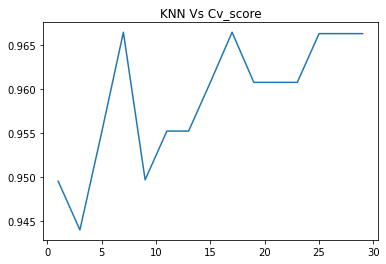

In [87]:
plt.plot(range(1,31,2),cv_scores)
plt.title('KNN Vs Cv_score')
plt.show()

In [94]:
 np.mean((cross_val_score(estimator=knn_model,X=X_scaled,y = y,cv=5)))

0.9663492063492063

In [ ]:
knn_1 = KNeighborsClassifier()
knn_1.fi